<a href="https://colab.research.google.com/github/Fazna-kozhipparambil/Global-Temperature-analysis/blob/main/Global_Temperature_Visualization_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file from the uploaded location
df = pd.read_csv('/content/Global Temperature.csv')
 # Display the first few rows of the dataframe
df.head()



,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.
0,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display column names
print(df.columns)



Index(['Year', ' Month', 'Monthly Anomaly', ' Monthly Unc.',
       '  Annual Anomaly', ' Annual Unc', 'Five-Year Anomaly',
       ' Five-Year Unc.', ' Ten-Year Anomaly', ' Ten-Year Unc.',
       '  Twenty-Year Anomaly', ' Twenty-year Unc.'],
      dtype='object')


**Create Simple Visualization**

1. Line Plot of Annual Anomalies

Let's plot the Year against the Annual Anomaly to see how the anomaly changes over time.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Plotting the Annual Anomaly over the years
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

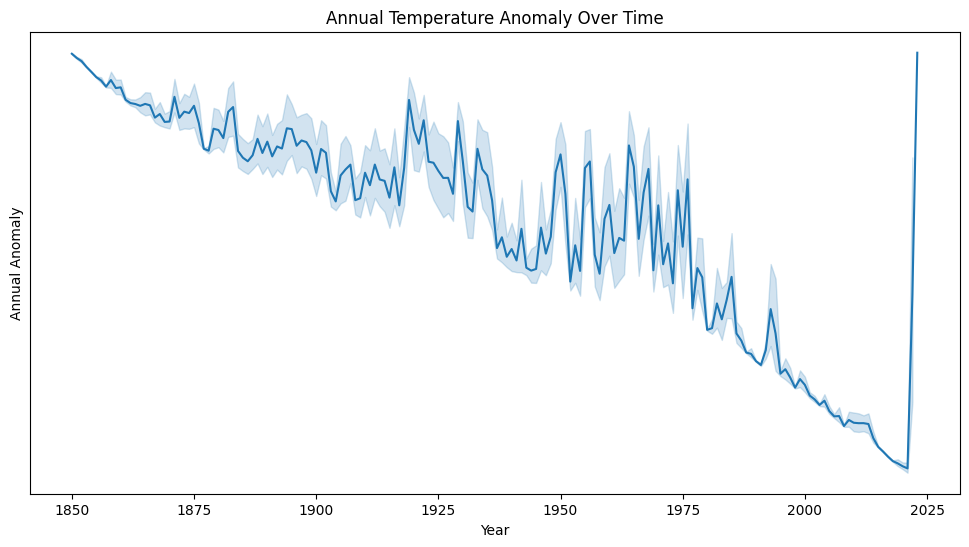

In [ ]:

# Plotting the Annual Anomaly over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='  Annual Anomaly', data=df)
plt.title('Annual Temperature Anomaly Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Anomaly')
# Remove y-axis tick marks and labels
ax = plt.gca()  # Get the current axis
ax.yaxis.set_ticks([])  # Remove tick marks
plt.show()


2. Line Plot of Monthly Anomalies

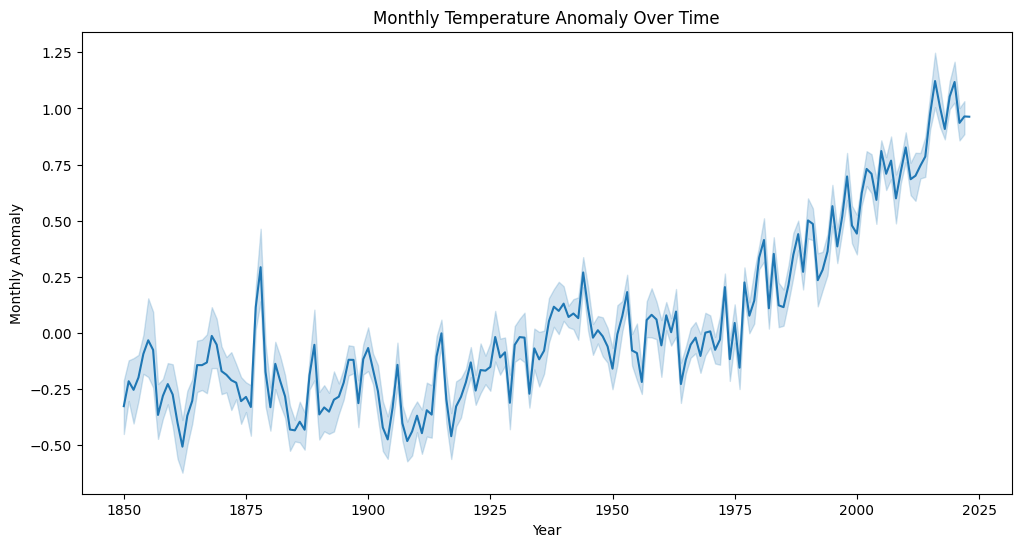

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Monthly Anomaly', data=df)
plt.title('Monthly Temperature Anomaly Over Time')
plt.xlabel('Year')
plt.ylabel('Monthly Anomaly')
plt.show()



3. Plotting Five-Year and Ten-Year Anomalies Together

You can compare the Five-Year Anomaly and Ten-Year Anomaly in the same plot:

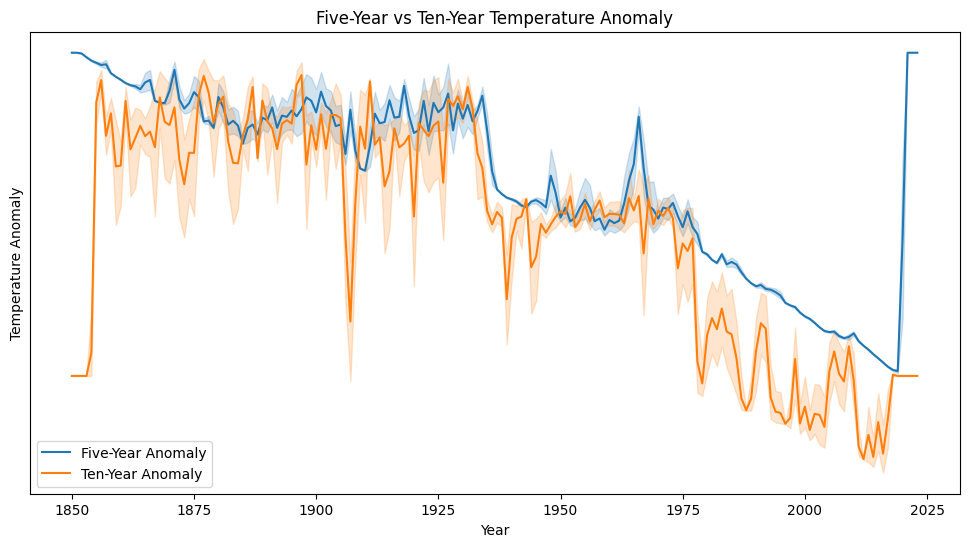

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Five-Year Anomaly', data=df, label='Five-Year Anomaly')
sns.lineplot(x='Year', y=' Ten-Year Anomaly', data=df, label='Ten-Year Anomaly')
plt.title('Five-Year vs Ten-Year Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
# Remove y-axis tick marks and labels
ax = plt.gca()  # Get the current axis
ax.yaxis.set_ticks([])  # Remove tick marks
plt.legend()
plt.show()


4. Scatter Plot with Monthly Anomaly and Uncertainty

To visualize the relationship between the Monthly Anomaly and Monthly Unc.:


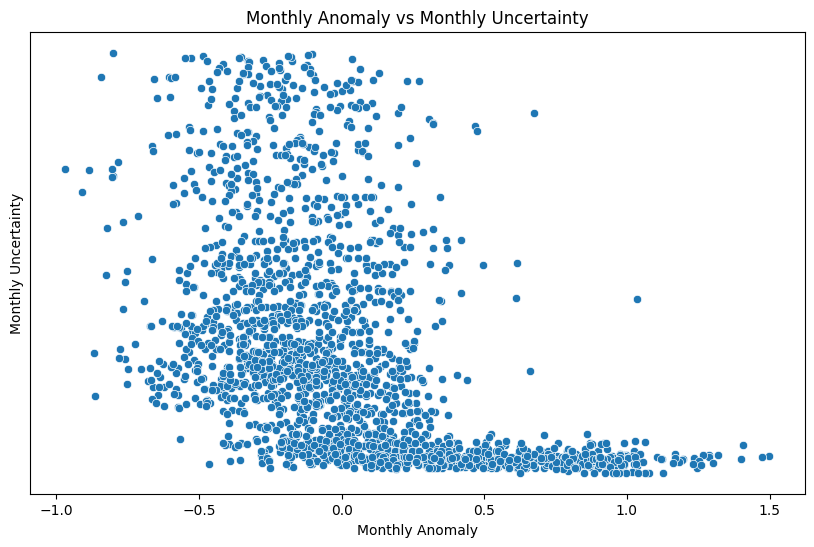

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Anomaly', y=' Monthly Unc.', data=df)
plt.title('Monthly Anomaly vs Monthly Uncertainty')
plt.xlabel('Monthly Anomaly')
plt.ylabel('Monthly Uncertainty')
# Remove y-axis tick marks and labels
ax = plt.gca()  # Get the current axis
ax.yaxis.set_ticks([])  # Remove tick marks

plt.show()


5. Visualization of Multiple Anomalies Together


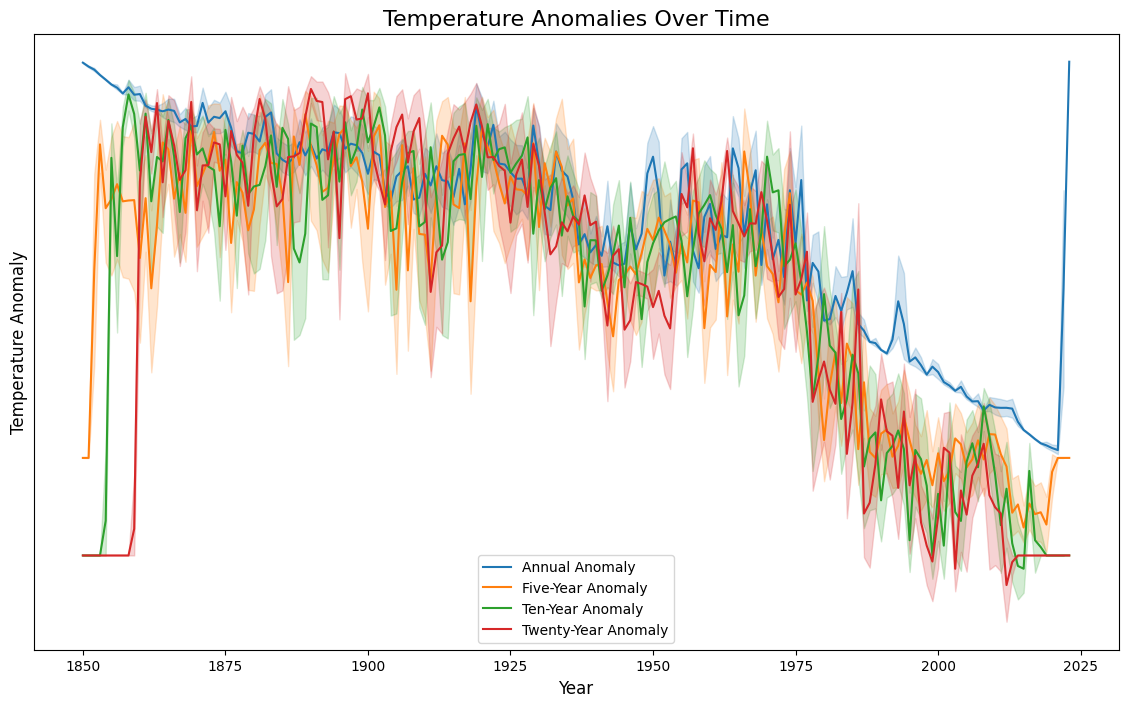

In [ ]:
plt.figure(figsize=(14, 8))

sns.lineplot(x='Year', y='  Annual Anomaly', data=df, label='Annual Anomaly')
sns.lineplot(x='Year', y='Five-Year Anomaly', data=df, label='Five-Year Anomaly')
sns.lineplot(x='Year', y=' Ten-Year Anomaly', data=df, label='Ten-Year Anomaly')
sns.lineplot(x='Year', y='  Twenty-Year Anomaly', data=df, label='Twenty-Year Anomaly')

# Titles and labels
plt.title('Temperature Anomalies Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly', fontsize=12)


# Remove y-axis tick marks and labels
ax = plt.gca()  # Get the current axis
ax.yaxis.set_ticks([])  # Remove tick marks


plt.legend()
plt.show()


**Analysis**

1. Correlation Analysis
Objective: Understand the relationships between different anomaly metrics (e.g., Annual Anomaly, Five-Year Anomaly, etc.).

Method: Use a correlation matrix with a heatmap to visualize how different anomaly measurements relate to each other.

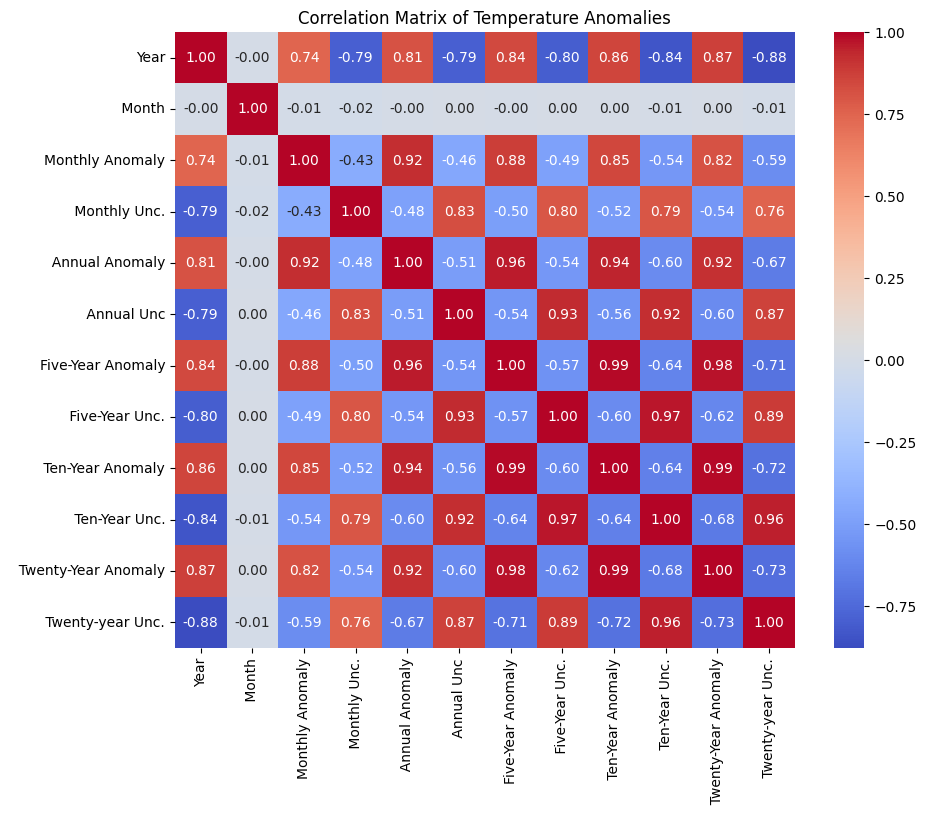

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Temperature Anomalies')
plt.show()


2. Moving Averages
Objective: Smooth out the data to identify long-term trends.

Method: Calculate moving averages for temperature anomalies over different periods (e.g., 5-year, 10-year).

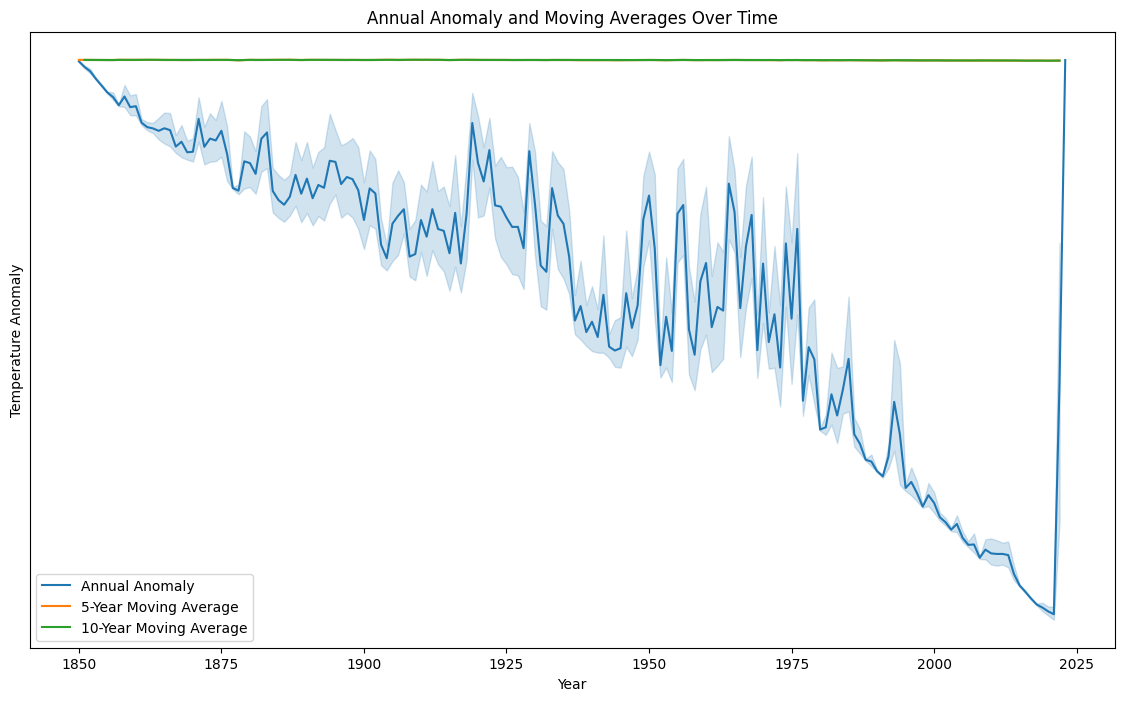

In [ ]:
df['5-Year MA'] = df['  Annual Anomaly'].rolling(window=5).mean()
df['10-Year MA'] = df['  Annual Anomaly'].rolling(window=10).mean()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='  Annual Anomaly', data=df, label='Annual Anomaly')
sns.lineplot(x='Year', y='5-Year MA', data=df, label='5-Year Moving Average')
sns.lineplot(x='Year', y='10-Year MA', data=df, label='10-Year Moving Average')
plt.title('Annual Anomaly and Moving Averages Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
# Remove y-axis tick marks and labels
ax = plt.gca()  # Get the current axis
ax.yaxis.set_ticks([])  # Remove tick marks
plt.legend()
plt.show()

In [ ]:
# Drop rows with any missing values
df_cleaned = df.dropna()

##Forward Fill: Fills missing values with the last known value.
df_filled = df.fillna(method='ffill')

#Backward Fill: Fills missing values with the next known value.
df_filled = df.fillna(method='bfill')

#Interpolation: Interpolates missing values based on the data trend.
df_filled = df.interpolate(method='linear')

<ipython-input-43-8ecfd191d04e>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')
<ipython-input-43-8ecfd191d04e>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='bfill')
<ipython-input-43-8ecfd191d04e>:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df.interpolate(method='linear')


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Fill missing values by linear interpolation
df_filled = df.interpolate(method='linear')

# Ensure no missing values remain
print(df_filled.isnull().sum())

# Convert to numeric if necessary
df_filled['  Annual Anomaly'] = pd.to_numeric(df_filled['  Annual Anomaly'], errors='coerce')

# Smoothing the data if necessary
df_smoothed = df_filled['  Annual Anomaly'].rolling(window=3, min_periods=1).mean()

# Perform seasonal decomposition with adjusted period
result = seasonal_decompose(df_smoothed, model='additive', period=12)

# Plot the components
result.plot()
plt.show()


Year                      0
 Month                    0
Monthly Anomaly           0
 Monthly Unc.             0
  Annual Anomaly          0
 Annual Unc               0
Five-Year Anomaly         0
 Five-Year Unc.           0
 Ten-Year Anomaly         0
 Ten-Year Unc.            0
  Twenty-Year Anomaly     0
 Twenty-year Unc.         0
5-Year MA                 9
10-Year MA               14
dtype: int64


<ipython-input-50-6d87a9fde0c8>:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df.interpolate(method='linear')


ValueError: This function does not handle missing values

3.Anomaly Detection
Objective: Identify years that had unusually high or low temperature anomalies.

Method: Use z-scores or other statistical methods to detect outliers.

<ipython-input-62-a318c542b0d3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['  Annual Anomaly'] = pd.to_numeric(df['  Annual Anomaly'], errors='coerce')
<ipython-input-62-a318c542b0d3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


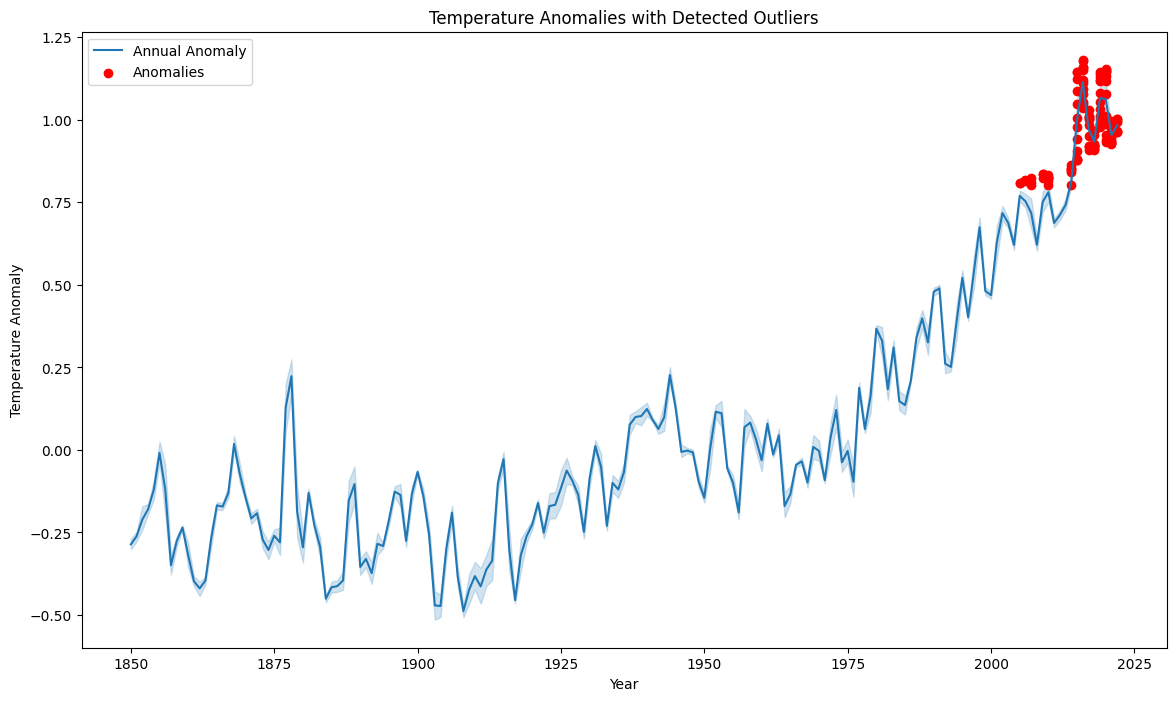

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Check for the presence and type of columns
if '  Annual Anomaly' not in df.columns or 'Year' not in df.columns:
    raise ValueError("Columns '  Annual Anomaly' or 'Year' are missing from the DataFrame")

# Ensure the data types are numeric
df['  Annual Anomaly'] = pd.to_numeric(df['  Annual Anomaly'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with missing values in 'Annual Anomaly' or 'Year'
df = df.dropna(subset=['  Annual Anomaly', 'Year'])

# Calculate z-scores of the 'Annual Anomaly' column
df['z_score'] = zscore(df['  Annual Anomaly'])

# Identify anomalies (adjust the threshold as needed)
anomalies = df[df['z_score'].abs() > 2]

# Plot the data and highlight anomalies
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='  Annual Anomaly', data=df, label='Annual Anomaly')
plt.scatter(anomalies['Year'], anomalies['  Annual Anomaly'], color='red', label='Anomalies')
plt.title('Temperature Anomalies with Detected Outliers')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.show()




4. Trend Analysis
Objective: Determine the long-term trend in temperature anomalies.

Method: Fit a linear regression model to the data to quantify the trend.

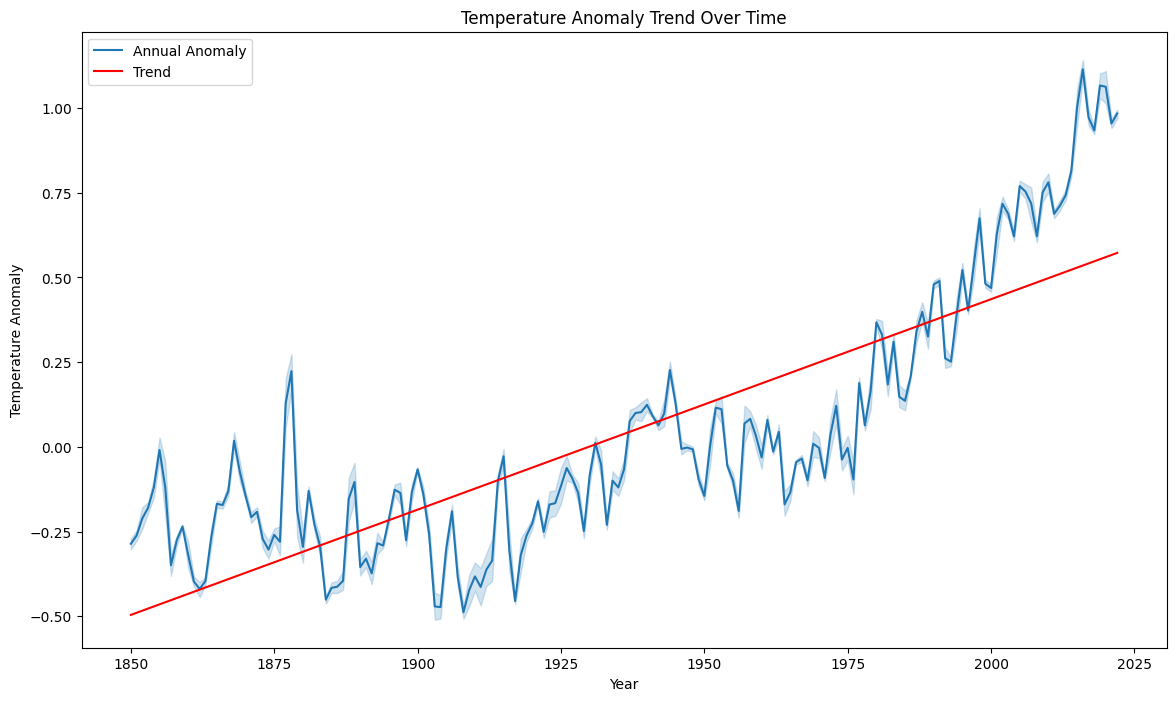

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
X = df['Year'].values.reshape(-1, 1)
y = df['  Annual Anomaly'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='  Annual Anomaly', data=df, label='Annual Anomaly')
plt.plot(df['Year'], trend, color='red', label='Trend')
plt.title('Temperature Anomaly Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.show()


5. Hypothesis Testing
Objective: Test hypotheses related to temperature anomalies, such as whether anomalies have significantly increased in the last century.

Method: Use statistical tests like t-tests, chi-square tests, etc.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Sample DataFrame for demonstration
# df = pd.read_csv('your_data.csv')

# Ensure 'Annual Anomaly' and 'Year' are numeric
df['  Annual Anomaly'] = pd.to_numeric(df['  Annual Anomaly'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with missing values in 'Annual Anomaly' or 'Year'
df = df.dropna(subset=['  Annual Anomaly', 'Year'])

# Split data into two periods
df_pre_1950 = df[df['Year'] < 1950]['  Annual Anomaly']
df_post_1950 = df[df['Year'] >= 1950]['  Annual Anomaly']

# Ensure there are no empty arrays
if df_pre_1950.empty or df_post_1950.empty:
    raise ValueError("One of the data periods is empty. Check the data filtering.")

# Perform a t-test
t_stat, p_val = ttest_ind(df_pre_1950, df_post_1950, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_val}")



T-statistic: -43.76529364940878, P-value: 1.4846541870011678e-296


Statistical Significance: Given that the p-value is extremely small (much less than common significance levels like 0.05 or 0.01), you can conclude that there is a statistically significant difference between the temperature anomalies before and after 1950.

Effect Size: The large magnitude of the t-statistic suggests a substantial difference between the two periods, indicating that the temperature anomalies have changed significantly over time.

**Interactive Dashboard**
1. Set Up Your Environment in Colab

In [1]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


2. Write  Streamlit App Code

In [2]:
%%writefile app.py

import streamlit as st
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/Global Temperature.csv')

# Streamlit app layout
st.title('Global Temperature Anomalies Dashboard')

# Year range slider
year_range = st.slider('Select Year Range', int(df['Year'].min()), int(df['Year'].max()), (1900, 2020))

# Filter data based on the selected year range
filtered_data = df[(df['Year'] >= year_range[0]) & (df['Year'] <= year_range[1])]

# Display the filtered data
st.write(f"Displaying data from {year_range[0]} to {year_range[1]}")
st.dataframe(filtered_data)

# Line plot for Annual Anomalies over time
fig_line = px.line(filtered_data, x='Year', y='Annual Anomaly',
                   title='Annual Temperature Anomalies Over Time')
st.plotly_chart(fig_line)

# Histogram of anomalies
fig_hist = px.histogram(filtered_data, x='Annual Anomaly',
                        nbins=20, title='Distribution of Annual Temperature Anomalies')
st.plotly_chart(fig_hist)


Writing app.py


3. Run Your Streamlit App Using Ngrok

In [ ]:
from pyngrok import ngrok

# Run the Streamlit app
!streamlit run app.py &

# Expose the app to the web using ngrok
public_url = ngrok.connect(port='8501')
public_url





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.0.148:8501

